Predict Likelihood of Admission
devrishi · 64 Submissions

Task Details
Using the supplied predictive variables (GRE score, TOEFL score, University Rating, etc) to predict the likelihood of admission of a new candidate.

Evaluation Criteria
The best model should be the one that evaluates to have the lowest RMSE overall, and please indicate the error you get on validation set containing the last 100 observations.

Expected Submission
Please submit a Kernel where the final cell outputs the RMSE score on the final 100 observations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
admin=pd.read_csv("/content/Admission.csv")

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )


In [3]:
admin.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admin.shape

(500, 9)

In [5]:
admin.info()#we can see that there are no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
admin.drop_duplicates(inplace=True)

In [7]:
admin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 39.1 KB


In [8]:
admin.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Outlier Detection

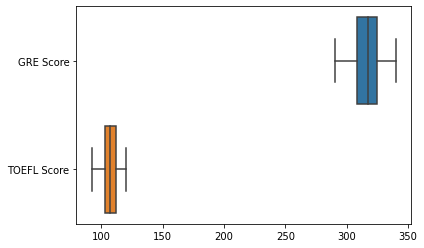

In [9]:
sns.boxplot(data = admin.iloc[:,1:3],orient='h',whis=1.5)
plt.show()#there are no outliers in TOEL AND GRE scores

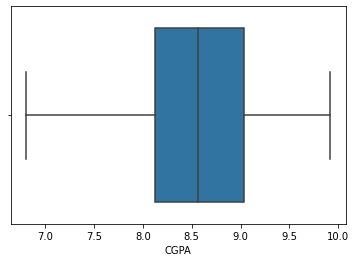

In [10]:
sns.boxplot(admin.CGPA)#there are no outliers in CGPA section

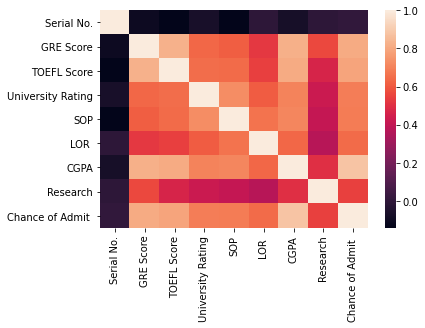

In [11]:
sns.heatmap(admin.corr())

In [12]:
admin.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [13]:
admin.columns=admin.columns.str.replace(' ',"_")

In [14]:
admin.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Bivariate Testing

In [15]:
stats.ttest_ind(admin[admin["Research"]==0].Chance_of_Admit_, admin[admin["Research"]==1].Chance_of_Admit_)
#ttest of 2 independent samples
#H0=There is no significant difference of the chances of admission
#H1=There is significant difference in the chances of admission
#hence we reject the null hypothesis

Ttest_indResult(statistic=-14.538797385517404, pvalue=3.5954935458409782e-40)

In [16]:
admin.groupby("Research").Chance_of_Admit_.mean()

Research
0    0.634909
1    0.789964
Name: Chance_of_Admit_, dtype: float64

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [18]:
mod = ols('Chance_of_Admit_~University_Rating	 ', data=admin).fit()
aov = sm.stats.anova_lm(mod) #fitted ols model to be passed
print(aov)#we reject the hypothesis

                      df    sum_sq   mean_sq           F        PR(>F)
University_Rating    1.0  4.734434  4.734434  452.894666  5.866256e-72
Residual           498.0  5.205952  0.010454         NaN           NaN


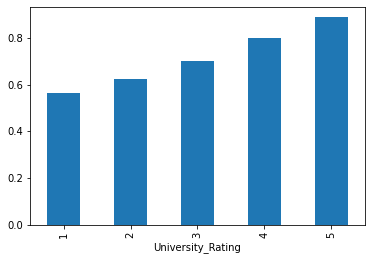

In [19]:
admin.groupby("University_Rating").Chance_of_Admit_.mean().plot(kind='bar')

In [20]:
admin.groupby(["SOP","LOR_"]).Chance_of_Admit_.mean()

SOP  LOR_
1.0  1.0     0.420000
     1.5     0.520000
     2.0     0.570000
     2.5     0.575000
1.5  1.5     0.490000
     2.0     0.516154
     2.5     0.505000
     3.0     0.672500
     3.5     0.585000
     4.0     0.580000
2.0  1.5     0.560000
     2.0     0.516667
     2.5     0.590625
     3.0     0.591111
     3.5     0.635000
     4.0     0.642500
     4.5     0.690000
2.5  1.5     0.555000
     2.0     0.636923
     2.5     0.648571
     3.0     0.653684
     3.5     0.650000
     4.0     0.670000
     4.5     0.653333
3.0  1.5     0.570000
     2.0     0.583750
     2.5     0.705556
     3.0     0.659130
     3.5     0.701304
     4.0     0.704444
     4.5     0.760000
     5.0     0.725000
3.5  2.0     0.593333
     2.5     0.688750
     3.0     0.697333
     3.5     0.710000
     4.0     0.733636
     4.5     0.787500
     5.0     0.760000
4.0  2.0     0.460000
     2.5     0.752500
     3.0     0.640000
     3.5     0.786000
     4.0     0.800526
     4.5     0.804286


Linear Regression Model

In [22]:
admin.head(3)

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [44]:
X=admin.iloc[:,1:8]
X

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [45]:
Y=admin.iloc[:,8]
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance_of_Admit_, Length: 500, dtype: float64

In [76]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 10)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()

In [79]:
LR = model.fit(x_train, y_train)

In [80]:
yp = model.predict(x_test)

In [93]:
yp_1=pd.DataFrame(yp)

In [97]:
y_test=pd.DataFrame(y_test).reset_index()

In [102]:
y_test

,level_0,Chance_of_Admit_
0,0,0.94
1,1,0.91
2,2,0.80
3,3,0.90
4,4,0.77
...,...,...
145,145,0.78
146,146,0.86
147,147,0.96
148,148,0.90


In [81]:
model.score(x_test,y_test)

0.8056353541641255

In [82]:

# print RMSE

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,yp))
RMSE


0.057655242349561764